***Цель проекта***: Отработать на практике полученные знания в области EDA (разведывательный анализ данных)


***Задача***: Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
# увеличиваем отображаемую область
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# изменяем формат вывода значений float
pd.options.display.float_format = '{:.2f}'.format

# импорт данных
main_df = pd.read_csv('stud_math.csv')

In [3]:
main_df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
142,GP,F,15,U,GT3,T,4.00,nan,teacher,services,course,mother,nan,3.00,0.00,no,yes,yes,yes,yes,-9.00,NaN,yes,no,4.00,2.00,2.00,5.00,2.00,55.00
1,GP,F,17,U,GT3,NaN,1.00,1.00,at_home,other,course,father,1.00,2.00,0.00,no,yes,no,no,no,-6.00,yes,yes,no,5.00,3.00,3.00,3.00,4.00,30.00
232,GP,M,17,U,GT3,T,4.00,nan,teacher,teacher,reputation,mother,1.00,2.00,0.00,yes,NaN,no,yes,yes,-6.00,yes,yes,yes,4.00,5.00,5.00,2.00,14.00,45.00
303,GP,F,17,U,GT3,T,3.00,2.00,health,NaN,reputation,father,1.00,4.00,0.00,no,yes,yes,yes,no,-12.00,yes,yes,no,5.00,2.00,2.00,5.00,0.00,90.00
191,GP,F,17,U,GT3,T,1.00,1.00,at_home,services,course,mother,1.00,2.00,0.00,no,no,no,yes,yes,-6.00,yes,NaN,no,5.00,3.00,3.00,3.00,0.00,45.00
149,GP,M,15,U,LE3,NaN,2.00,1.00,services,other,course,mother,4.00,1.00,3.00,no,NaN,no,no,yes,-3.00,NaN,yes,no,4.00,5.00,5.00,5.00,0.00,50.00
170,GP,M,16,U,GT3,T,3.00,4.00,other,other,course,father,3.00,1.00,nan,no,yes,no,yes,no,-3.00,NaN,yes,no,3.00,4.00,5.00,2.00,0.00,0.00
31,GP,M,15,U,GT3,T,4.00,4.00,services,NaN,reputation,mother,2.00,2.00,0.00,no,yes,NaN,yes,yes,-6.00,yes,yes,no,4.00,3.00,1.00,5.00,0.00,85.00
382,MS,M,17,U,GT3,T,2.00,3.00,other,services,NaN,father,2.00,2.00,0.00,no,no,no,yes,yes,-6.00,NaN,yes,no,4.00,4.00,3.00,3.00,2.00,50.00
246,GP,M,17,U,GT3,T,2.00,3.00,other,other,course,father,2.00,1.00,0.00,no,NaN,NaN,no,yes,-3.00,yes,yes,no,5.00,2.00,2.00,2.00,4.00,65.00


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

- в каждом столбце кроме первых трех есть незаполненные значения

### Предобработка

In [5]:
# удаляем столбец "studytime, granular" с неизвестными нам данными
main_df = main_df.drop('studytime, granular', axis=1)

# так как значения Score наиболее значимые, удаляем строки с пустыми значениями Score
main_df = main_df.drop(main_df[main_df.score.isna() == True].index, axis=0)

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

In [6]:
# переименовываем столбцы
main_df.columns = ['school_id',        # аббревиатура школы
                   'sex',              # пол ('F' - женский, 'M' - мужской)
                   'age',              # возраст (от 15 до 22)
                   'address',          # тип адреса ('U' - городской, 'R' - за городом)
                   'family_size',      # размер семьи ('LE3' <= 3, 'GT3' >3)
                   'cohabitation',     # статус совместного проживания родителей ('T' - живут вместе 'A' - раздельно)
                   'm_education',      # образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
                   'f_education',      # образование отца
                   'm_occupation',     # род занятий матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
                   'f_occupation',     # род занятий отца
                   'reason',           # причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
                   'guardian',         # опекун ('mother' - мать, 'father' - отец, 'other' - другое)
                   'commute_time',     # время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
                   'study_time',       # время на учёбу помимо школы (в неделю) (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
                   'failures',         # количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
                   'school_support',   # дополнительная образовательная поддержка (yes или no)
                   'family_support',   # семейная образовательная поддержка (yes или no)
                   'paid_lessons',     # дополнительные платные занятия по математике (yes или no)
                   'activities',       # дополнительные внеучебные занятия (yes или no)
                   'nursery',          # посещал детский сад (yes или no)
                   'higher',           # хочет получить высшее образование (yes или no)
                   'internet',         # наличие интернета дома (yes или no)
                   'romantic',         # в романтических отношениях (yes или no)
                   'family_relation',  # семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
                   'free_time',        # свободное время после школы (от 1 - очень мало до 5 - очень мого)
                   'go_out',           # проведение времени с друзьями (от 1 - очень мало до 5 - очень мого)
                   'health',           # текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
                   'absences',         # количество пропущенных занятий
                   'score'             # баллы по госэкзамену по математике
                   ]
main_df.head()

,school_id,sex,age,address,family_size,cohabitation,m_education,f_education,m_occupation,f_occupation,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_lessons,activities,nursery,higher,internet,romantic,family_relation,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.00,4.00,at_home,teacher,course,mother,2.00,2.00,0.00,yes,no,no,no,yes,yes,NaN,no,4.00,3.00,4.00,3.00,6.00,30.00
1,GP,F,17,U,GT3,NaN,1.00,1.00,at_home,other,course,father,1.00,2.00,0.00,no,yes,no,no,no,yes,yes,no,5.00,3.00,3.00,3.00,4.00,30.00
2,GP,F,15,U,LE3,T,1.00,1.00,at_home,other,other,mother,1.00,2.00,3.00,yes,no,NaN,no,yes,yes,yes,NaN,4.00,3.00,2.00,3.00,10.00,50.00
3,GP,F,15,U,GT3,T,4.00,2.00,health,NaN,home,mother,1.00,3.00,0.00,no,yes,yes,yes,yes,yes,yes,yes,3.00,2.00,2.00,5.00,2.00,75.00
4,GP,F,16,U,GT3,T,3.00,3.00,other,other,home,father,1.00,2.00,0.00,no,yes,yes,no,yes,yes,no,no,4.00,3.00,2.00,5.00,4.00,50.00


### Вспомогательные функции

In [7]:
# функция построения гистограммы
def get_hist(column):
    temp_df = main_df[column]
    temp_df.dropna(inplace=True)
    fig, ax = plt.subplots()
    ax.hist(temp_df)
    ax.set_title(column)


# функция замены пустых строк на None
def change2none(column):
    main_df[column] = main_df[column].\
        apply(lambda x: None if pd.isna(x) == True else x)


# функция замены пустых строк на Other
def change2other(column):
    main_df[column] = main_df[column].\
        apply(lambda x: 'other' if pd.isna(x) == True else x)


# функция замены пустых строк на моду
def change2mode(column):
    mode = pd.DataFrame(main_df[column].value_counts())
    main_df[column] = main_df[column].\
        apply(lambda x: mode.index[0] if pd.isna(x) == True else x)


# функция подсчета процентного соотношения
def value_balance(column):

    count = pd.DataFrame(column.value_counts())
    total = len(column)
    null_count = len(main_df[column.isna() == True])
    null_percent = round((null_count/total)*100, 2)
    print(column.describe(), '\n', '\n',
          'Кол-во пустых значений: {n} ({np}%)'.format(n=null_count, np=null_percent))

    # задаем график
    fig, ax = plt.subplots()
    data = ax.barh(y=count.index,
                   width=count.iloc[:, 0],
                   color=['tab:blue', 'tab:orange'])

    # добавляем в график аннотацию
    for i in data:
        width = i.get_width()
        height = i.get_height()
        ax.annotate('{w} ({p}%)'.format(w=width, p=round((width/total)*100, 2)),
                    xy=(3, i.get_y() + height / 2),
                    ha='left',
                    va='center')

    # настраиваем вид графика
    ax.set_xlabel('Count')
    ax.set_ylabel(count.columns[0])


# функция построения pivot table гистограммы
def pt(value1, value2):
    ax = main_df.pivot_table(values='sex',
                             index=[value1, value2],
                             aggfunc='count').plot(kind='bar',
                                                   color=['tab:blue'],
                                                   legend=False)
    # настраиваем вид графика
    ax.set_xlabel('{v1} & {v2}'.format(v1=value1, v2=value2))
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    total = len(main_df)

    # добавляем в график аннотацию
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2, 10,
                '{h} ({p}%)'.format(h=i.get_height(),
                                    p=round((i.get_height()/total)*100, 2)),
                color='k',
                rotation=90,
                ha='center',
                va='bottom')


# функция подсчета границы выбросов
def get_outlier(column):
    perc75 = main_df[column].quantile(q=0.75, interpolation='midpoint')
    perc25 = main_df[column].quantile(q=0.25, interpolation='midpoint')
    iqr = perc75-perc25

    cols = main_df[column].value_counts().index

    # границы выбросов
    upper_bound = perc75+1.5*iqr
    lower_bound = perc25-1.5*iqr

    print('25-й перцентиль: {}, '.format(perc25),
          '75-й перцентиль: {}, '.format(perc75),
          'IQR: {}, '.format(iqr),
          'Границы выбросов: [{f}<->{l}]\n'.format(f=lower_bound, l=upper_bound))

    count = []  # лист выбросов
    for i in cols:
        if i > upper_bound and i > perc75:
            count.append(i)
        elif i < lower_bound and i < perc25:
            count.append(i)
    if len(count) == 0:
        print('Выбросов нет')
    else:
        print('Значения которые являются выбросами: ', sorted(count))

## Проверка на выбросы

<ipython-input-7-442cca6cf425>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


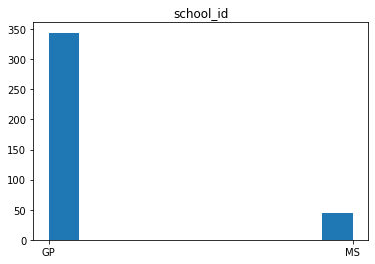

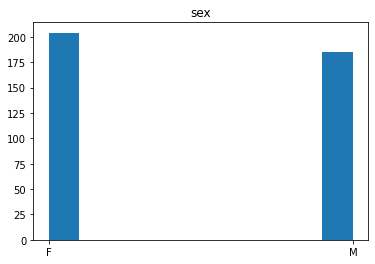

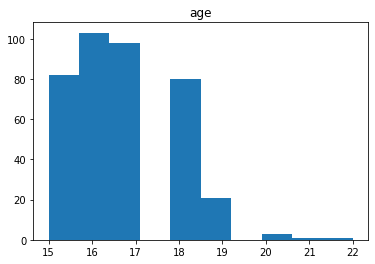

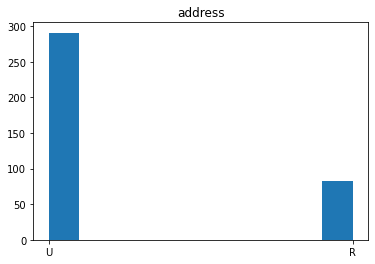

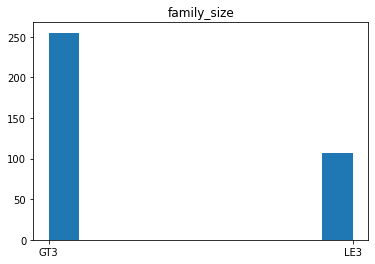

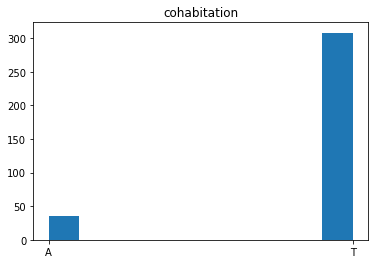

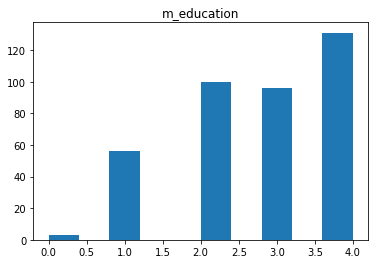

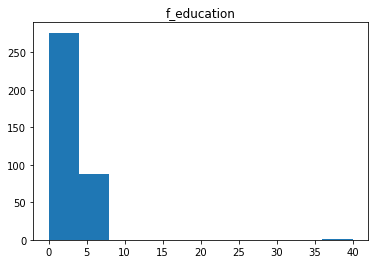

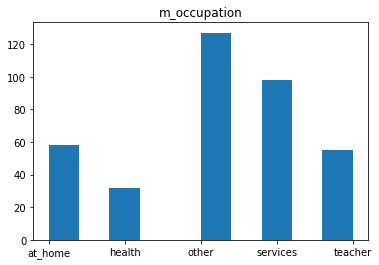

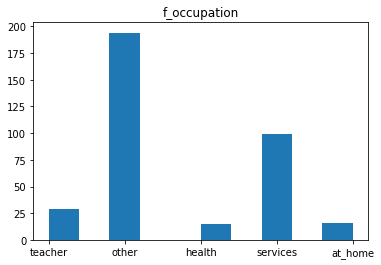

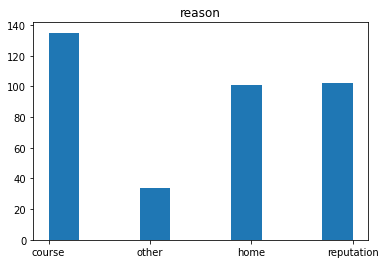

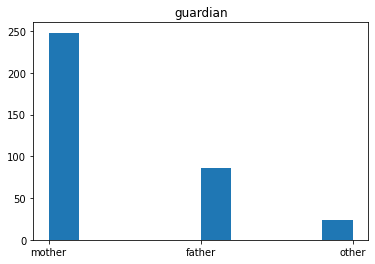

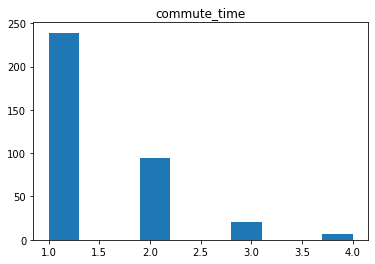

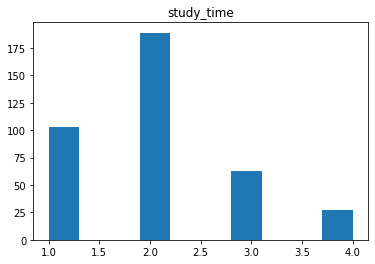

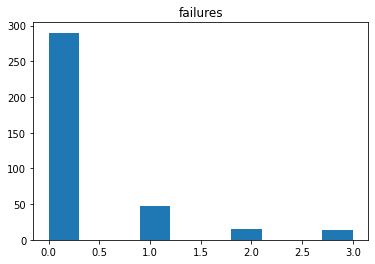

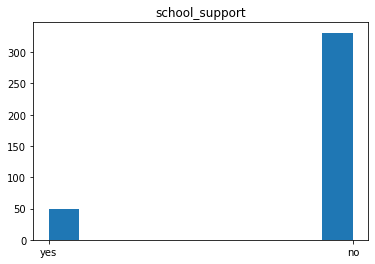

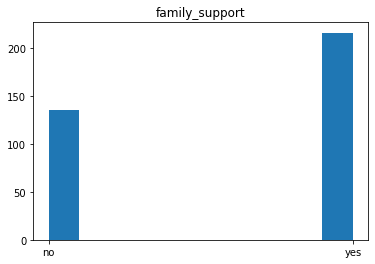

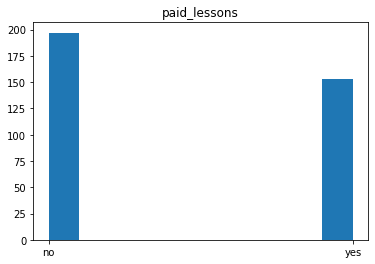

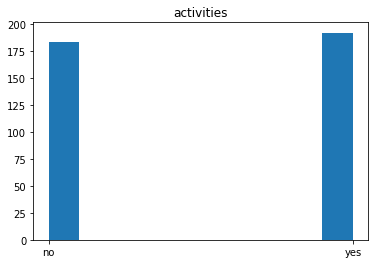

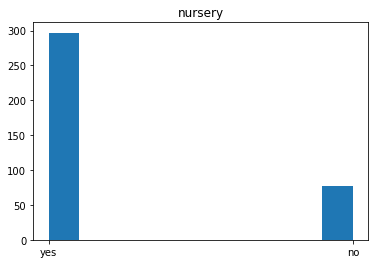

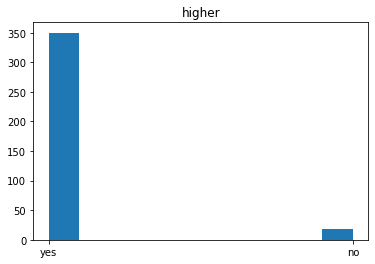

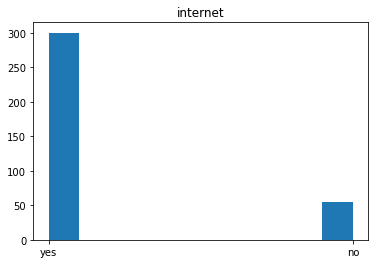

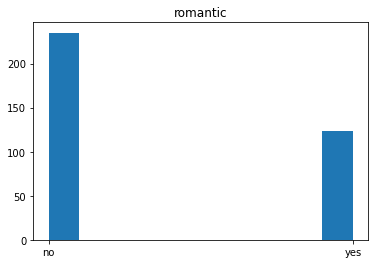

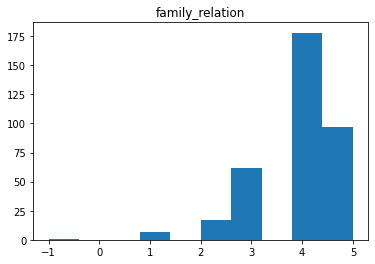

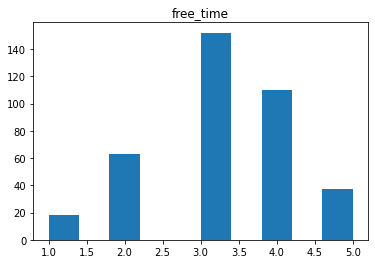

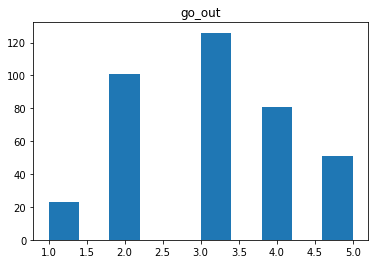

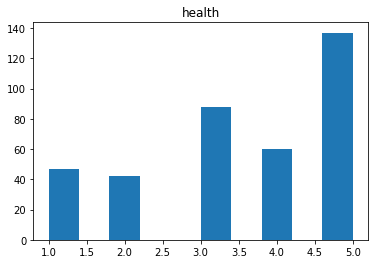

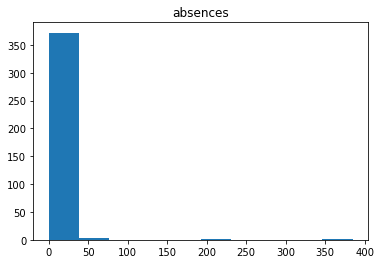

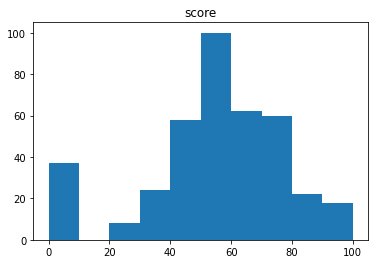

In [8]:
for col in main_df.columns:
    get_hist(col)

Есть выброс в ***f_education***: одно значение равное 40. Предположим, что это опечатка и уберем знак "0"

In [9]:
main_df.f_education = main_df.f_education.\
    apply(lambda x: float(str(x).replace('0', '')) if x > 4 else x)

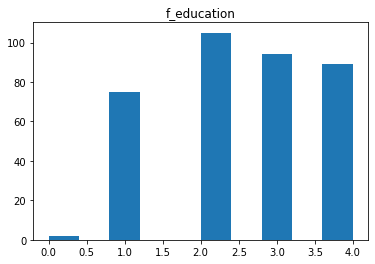

In [10]:
get_hist('f_education')

Есть выброс в ***family_relation***: одно значение равное -1. Предположим, что это опечатка и уберем знак минус

In [11]:
main_df.family_relation = main_df.family_relation.\
    apply(lambda x: float(str(x).replace('-', '')) if x < 4 else x)

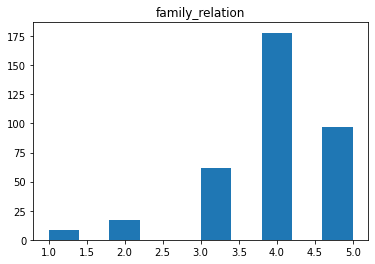

In [12]:
get_hist('family_relation')

Есть выброс в ***absences***: несколько учеников пропустило очень много занятий. Очевидно, что это единичные случаи и их можно удалить

In [13]:
get_outlier('absences')

25-й перцентиль: 0.0,  75-й перцентиль: 8.0,  IQR: 8.0,  Границы выбросов: [-12.0<->20.0]

Значения которые являются выбросами:  [21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0]


In [14]:
main_df[main_df.absences > 20]

,school_id,sex,age,address,family_size,cohabitation,m_education,f_education,m_occupation,f_occupation,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_lessons,activities,nursery,higher,internet,romantic,family_relation,free_time,go_out,health,absences,score
40,GP,F,16,U,LE3,T,2.00,2.00,other,other,home,mother,2.00,2.00,1.00,no,NaN,no,yes,no,yes,yes,yes,3.00,3.00,3.00,3.00,25.00,55.00
74,GP,F,16,U,GT3,T,3.00,3.00,other,services,home,mother,1.00,2.00,0.00,yes,yes,yes,yes,yes,yes,yes,no,4.00,nan,3.00,5.00,54.00,55.00
103,GP,F,15,U,GT3,T,3.00,2.00,services,other,home,mother,2.00,2.00,0.00,yes,yes,yes,no,yes,yes,yes,no,4.00,3.00,5.00,2.00,26.00,30.00
183,GP,F,17,U,LE3,NaN,3.00,3.00,other,other,reputation,mother,1.00,2.00,0.00,no,yes,no,yes,yes,yes,yes,yes,5.00,3.00,3.00,1.00,56.00,40.00
198,GP,F,17,U,GT3,NaN,4.00,4.00,services,teacher,home,mother,2.00,1.00,1.00,no,yes,no,no,yes,yes,NaN,no,4.00,2.00,4.00,2.00,24.00,90.00
205,GP,F,17,U,GT3,T,3.00,4.00,at_home,services,home,mother,1.00,3.00,1.00,no,yes,yes,no,yes,yes,yes,yes,4.00,4.00,3.00,5.00,28.00,45.00
216,GP,F,17,U,GT3,T,4.00,3.00,other,NaN,reputation,mother,1.00,2.00,2.00,no,no,yes,no,yes,yes,yes,yes,3.00,4.00,5.00,1.00,22.00,20.00
222,GP,F,16,U,GT3,T,2.00,3.00,services,teacher,other,mother,1.00,2.00,0.00,yes,NaN,no,no,yes,yes,yes,no,2.00,3.00,1.00,3.00,385.00,85.00
260,GP,F,18,U,GT3,NaN,4.00,3.00,NaN,other,home,father,1.00,2.00,0.00,no,yes,yes,no,yes,yes,yes,yes,3.00,1.00,2.00,2.00,21.00,90.00
276,GP,F,18,R,GT3,A,3.00,2.00,other,services,home,mother,2.00,2.00,0.00,no,NaN,no,no,no,no,yes,yes,nan,1.00,1.00,5.00,75.00,45.00


In [15]:
main_df = main_df.drop(main_df[main_df.absences > 30].index, axis=0)

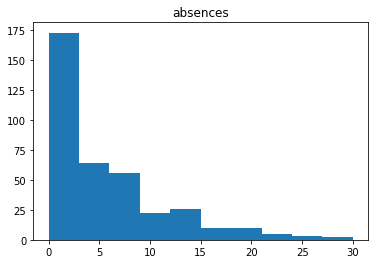

In [16]:
get_hist('absences')

# Первичный анализ данных в столбцах

### school_id - аббревиатура школы

count     382
unique      2
top        GP
freq      338
Name: school_id, dtype: object 
 
 Кол-во пустых значений: 0 (0.0%)


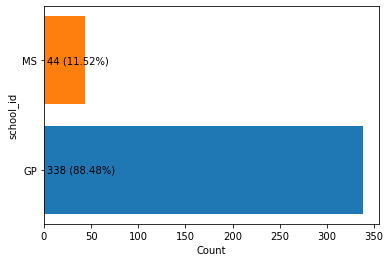

In [17]:
value_balance(main_df.school_id)

- Имеем данные по двум школам

### sex - пол

count     382
unique      2
top         F
freq      199
Name: sex, dtype: object 
 
 Кол-во пустых значений: 0 (0.0%)


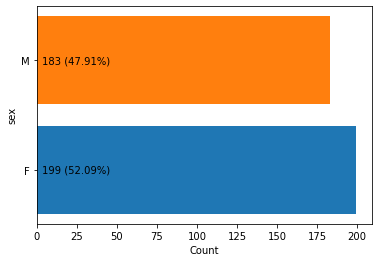

In [18]:
value_balance(main_df.sex)

- Девочек (F) больше чем мальчиков (M), 53% и 47 % соответственно, что, в целом, соответствует статистике по миру

### age - возраст

count   382.00
mean     16.65
std       1.25
min      15.00
25%      16.00
50%      17.00
75%      18.00
max      22.00
Name: age, dtype: float64 
 
 Кол-во пустых значений: 0 (0.0%)


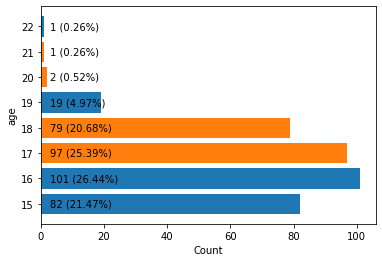

In [19]:
value_balance(main_df.age)

In [20]:
get_outlier('age')

25-й перцентиль: 16.0,  75-й перцентиль: 18.0,  IQR: 2.0,  Границы выбросов: [13.0<->21.0]

Значения которые являются выбросами:  [22]


- Предположим, что ученики старше 19 лет имеют плохую успеваемость или проблемы со здоровьем (оставались на "второй" год и т.п.), поэтому будем считать эти данные корректными 

In [21]:
main_df[main_df.age > 19]

,school_id,sex,age,address,family_size,cohabitation,m_education,f_education,m_occupation,f_occupation,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_lessons,activities,nursery,higher,internet,romantic,family_relation,free_time,go_out,health,absences,score
247,GP,M,22,U,GT3,T,3.00,1.00,services,services,other,mother,1.00,1.00,3.00,no,no,no,no,no,no,yes,yes,5.00,4.00,5.00,1.00,16.00,40.00
306,GP,M,20,U,GT3,A,3.00,2.00,services,other,course,other,1.00,1.00,0.00,no,no,no,yes,yes,yes,no,no,5.00,5.00,3.00,5.00,0.00,90.00
376,MS,F,20,NaN,GT3,T,4.00,2.00,health,other,course,NaN,2.00,3.00,2.00,no,yes,yes,no,no,yes,yes,yes,5.00,4.00,3.00,3.00,4.00,75.00
392,MS,M,21,R,GT3,T,1.00,1.00,other,other,course,NaN,1.00,1.00,3.00,NaN,no,no,no,no,NaN,no,no,5.00,5.00,3.00,3.00,3.00,35.00


### address - тип адреса

count     367
unique      2
top         U
freq      286
Name: address, dtype: object 
 
 Кол-во пустых значений: 15 (3.93%)


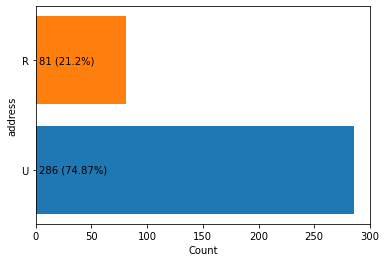

In [22]:
value_balance(main_df.address)

- Большинство учеников проживают в городе (75%)
- Есть 15 пустых строк: Проверим можно ли заполнить эти строки значениями основываясь на типе школы (так как в школе MS учатся 12% от всего количества учеников, предположим, что это "сельская школа")

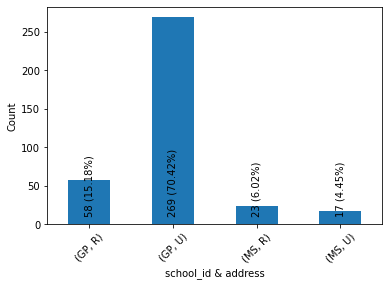

In [23]:
pt('school_id', 'address')

- В школе MS примерно поровну учеников из "города" и "загорода", поэтому мы не можем заполнить пустые строки

### family_size - размер семьи

count     355
unique      2
top       GT3
freq      250
Name: family_size, dtype: object 
 
 Кол-во пустых значений: 27 (7.07%)


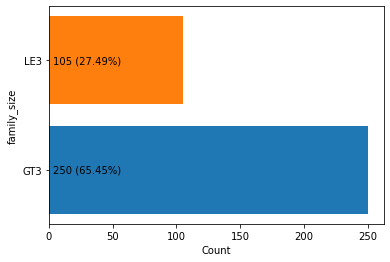

In [24]:
value_balance(main_df.family_size)

- 65% семей состоят из 4 и более человек (GT3)

### cohabitation - статус совместного проживания родителей

count     339
unique      2
top         T
freq      305
Name: cohabitation, dtype: object 
 
 Кол-во пустых значений: 43 (11.26%)


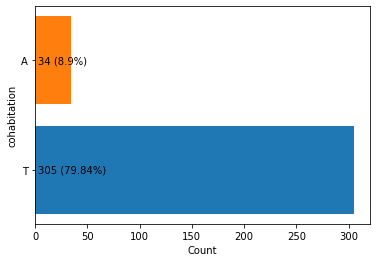

In [25]:
value_balance(main_df.cohabitation)

- 80% родителей живут совместно

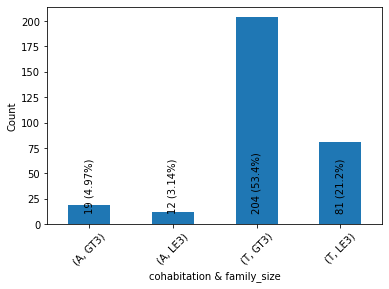

In [26]:
pt('cohabitation', 'family_size')

### m_education - образование матери

count   379.00
mean      2.77
std       1.10
min       0.00
25%       2.00
50%       3.00
75%       4.00
max       4.00
Name: m_education, dtype: float64 
 
 Кол-во пустых значений: 3 (0.79%)


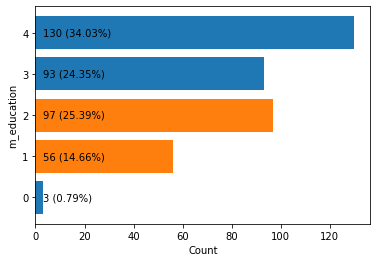

In [27]:
value_balance(main_df.m_education)

In [28]:
get_outlier('m_education')

25-й перцентиль: 2.0,  75-й перцентиль: 4.0,  IQR: 2.0,  Границы выбросов: [-1.0<->7.0]

Выбросов нет


### f_education - образование отца

count   358.00
mean      2.52
std       1.09
min       0.00
25%       2.00
50%       2.00
75%       3.00
max       4.00
Name: f_education, dtype: float64 
 
 Кол-во пустых значений: 24 (6.28%)


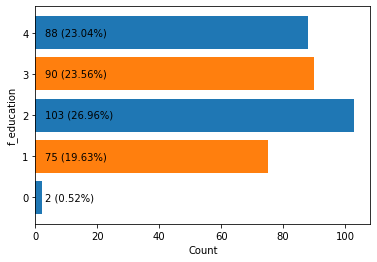

In [29]:
value_balance(main_df.f_education)

In [30]:
get_outlier('f_education')

25-й перцентиль: 2.0,  75-й перцентиль: 3.0,  IQR: 1.0,  Границы выбросов: [0.5<->4.5]

Значения которые являются выбросами:  [0.0]


- Значней "0" выходит за границы и формально может считаться выбросом, однако т.к. в m_education это значение не является выбросом оставим его

### m_occupation - род занятий матери

count       363
unique        5
top       other
freq        123
Name: m_occupation, dtype: object 
 
 Кол-во пустых значений: 19 (4.97%)


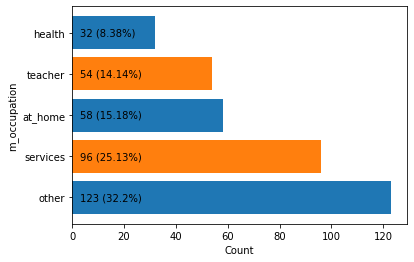

In [31]:
value_balance(main_df.m_occupation)

- так как род занятий большинства неизвестен (имеет значение other), замена пустых значений на моду не внесте больших статистических погрешностей 

count       382
unique        5
top       other
freq        142
Name: m_occupation, dtype: object 
 
 Кол-во пустых значений: 0 (0.0%)


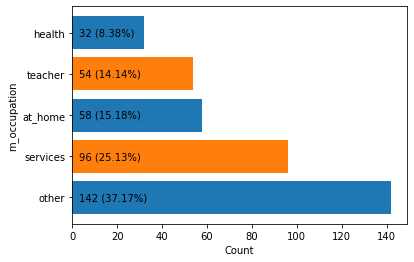

In [32]:
change2mode('m_occupation')

value_balance(main_df.m_occupation)

### f_occupation - род занятий отца

count       346
unique        5
top       other
freq        192
Name: f_occupation, dtype: object 
 
 Кол-во пустых значений: 36 (9.42%)


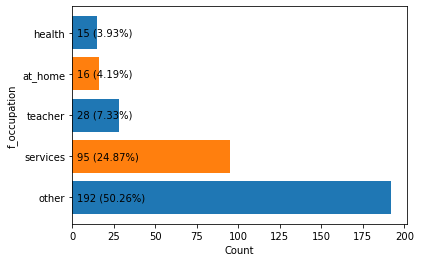

In [33]:
value_balance(main_df.f_occupation)

- так как род занятий большинства неизвестен (имеет значение other), замена пустых значений на моду не внесет больших статистических погрешностей 

count       382
unique        5
top       other
freq        228
Name: f_occupation, dtype: object 
 
 Кол-во пустых значений: 0 (0.0%)


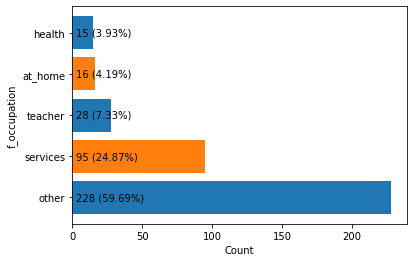

In [34]:
change2mode('f_occupation')

value_balance(main_df.f_occupation)

### reason - причина выбора школы

count        365
unique         4
top       course
freq         134
Name: reason, dtype: object 
 
 Кол-во пустых значений: 17 (4.45%)


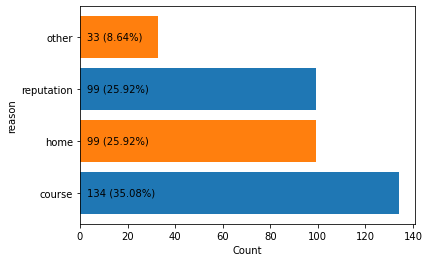

In [35]:
value_balance(main_df.reason)

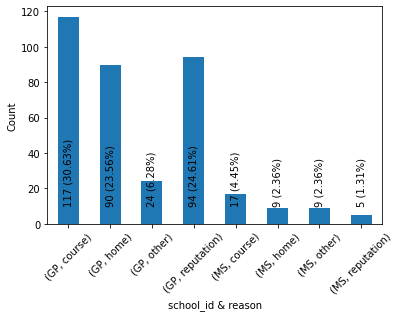

In [36]:
pt('school_id', 'reason')

- так как из-за практически одинакового распределения причин выбора школы вариантов замены пустых заначении слишком много, а вариант Other у нас все равно есть, запишем все туда

count        382
unique         4
top       course
freq         134
Name: reason, dtype: object 
 
 Кол-во пустых значений: 0 (0.0%)


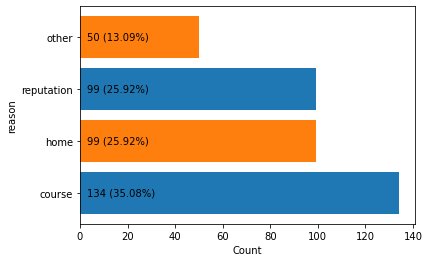

In [37]:
change2other('reason')

value_balance(main_df.reason)

### guardian - опекун

count        352
unique         3
top       mother
freq         244
Name: guardian, dtype: object 
 
 Кол-во пустых значений: 30 (7.85%)


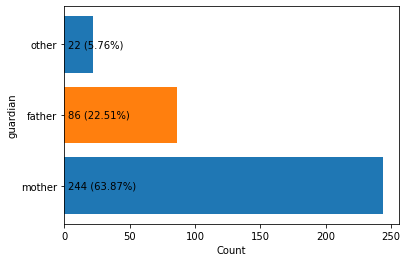

In [38]:
value_balance(main_df.guardian)

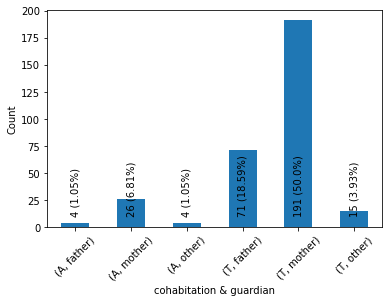

In [39]:
pt('cohabitation', 'guardian')

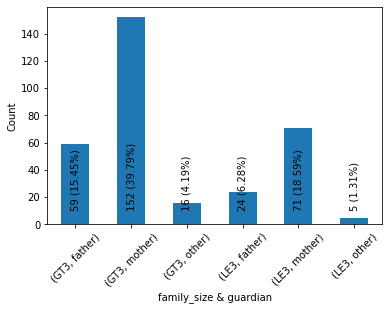

In [40]:
pt('family_size', 'guardian')

- По размеру семьи или по тому живут ли родители вместе/раздельно сложно предсказать опекунa, поэтому оставим пустые значения без изменений

### commute_time - время в пути до школы

count   354.00
mean      1.44
std       0.70
min       1.00
25%       1.00
50%       1.00
75%       2.00
max       4.00
Name: commute_time, dtype: float64 
 
 Кол-во пустых значений: 28 (7.33%)


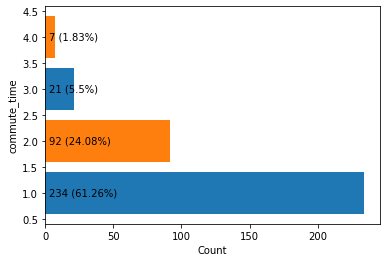

In [41]:
value_balance(main_df.commute_time)

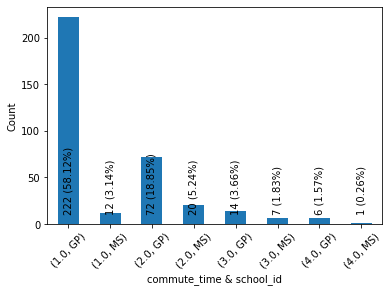

In [42]:
pt('commute_time', 'school_id')

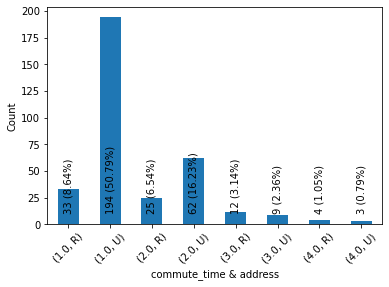

In [43]:
pt('commute_time', 'address')

### study_time - время на учёбу помимо школы (в неделю)

count   375.00
mean      2.04
std       0.85
min       1.00
25%       1.00
50%       2.00
75%       2.00
max       4.00
Name: study_time, dtype: float64 
 
 Кол-во пустых значений: 7 (1.83%)


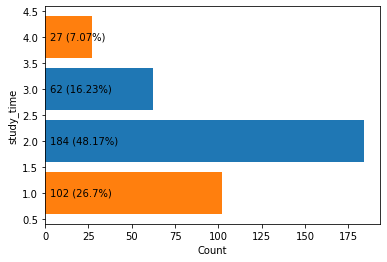

In [44]:
value_balance(main_df.study_time)

### failures - количество внеучебных неудач

count   360.00
mean      0.32
std       0.73
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       3.00
Name: failures, dtype: float64 
 
 Кол-во пустых значений: 22 (5.76%)


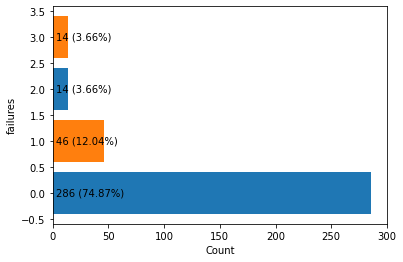

In [45]:
value_balance(main_df.failures)

- Исходя из описание датасета (n, если 1<=n<=3, иначе 0) наиболее часто встречающееся значение "0" не информативно, т.к. включает в себя учеников без внеучебных неудач и тех у которых их более трех. Использование подобных данных может привести к ошибочным выводам. Поэтому удалить данный столбец

In [46]:
main_df = main_df.drop('failures', axis=1)

### school_support - дополнительная образовательная поддержка

count     373
unique      2
top        no
freq      326
Name: school_support, dtype: object 
 
 Кол-во пустых значений: 9 (2.36%)


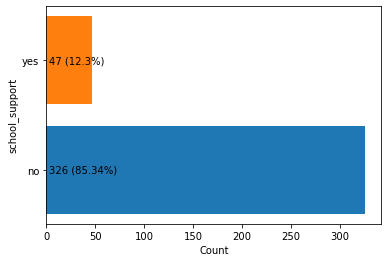

In [47]:
value_balance(main_df.school_support)

### family_support - семейная образовательная поддержка

count     346
unique      2
top       yes
freq      212
Name: family_support, dtype: object 
 
 Кол-во пустых значений: 36 (9.42%)


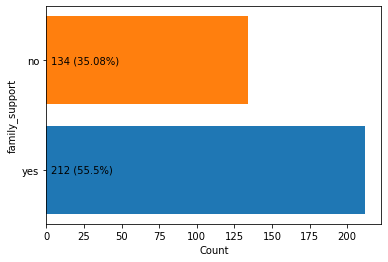

In [48]:
value_balance(main_df.family_support)

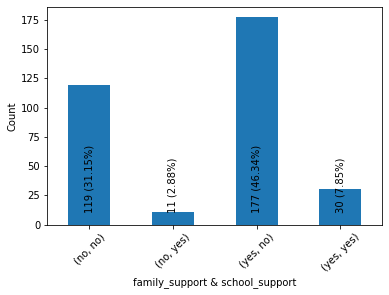

In [49]:
pt('family_support', 'school_support')

- Большинство учеников получающие родительскую поддержку не получают дополнительной школьной поддержки
- Так же много учеников не получающих никакой поддержки

### paid_lessons - дополнительные платные занятия по математике

count     343
unique      2
top        no
freq      193
Name: paid_lessons, dtype: object 
 
 Кол-во пустых значений: 39 (10.21%)


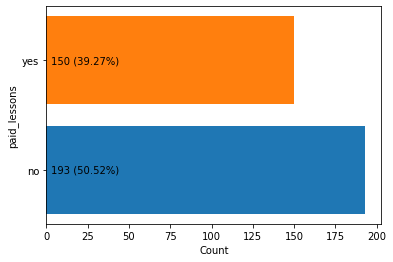

In [50]:
value_balance(main_df.paid_lessons)

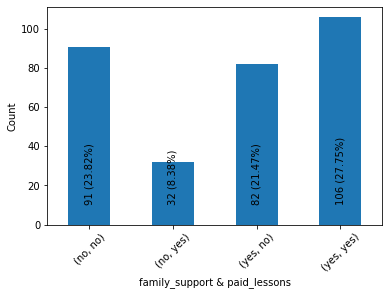

In [51]:
pt('family_support', 'paid_lessons')

- Большинство учеников не получающие родительскую поддержку ходят на платные курсы

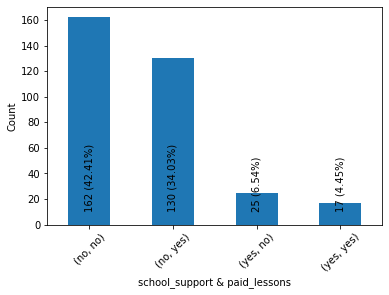

In [52]:
pt('school_support', 'paid_lessons')

### activities - дополнительные внеучебные занятия

count     368
unique      2
top       yes
freq      190
Name: activities, dtype: object 
 
 Кол-во пустых значений: 14 (3.66%)


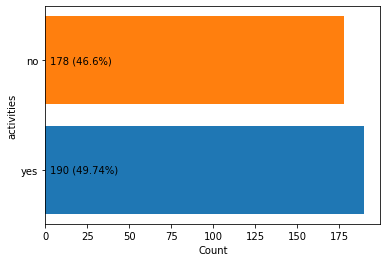

In [53]:
value_balance(main_df.activities)

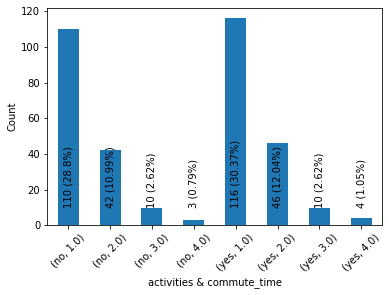

In [54]:
pt('activities', 'commute_time')

### nursery - посещал детский сад

count     367
unique      2
top       yes
freq      291
Name: nursery, dtype: object 
 
 Кол-во пустых значений: 15 (3.93%)


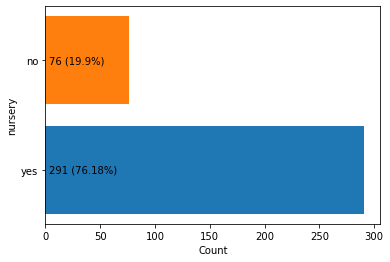

In [55]:
value_balance(main_df.nursery)

### higher - хочет получить высшее образование

count     362
unique      2
top       yes
freq      344
Name: higher, dtype: object 
 
 Кол-во пустых значений: 20 (5.24%)


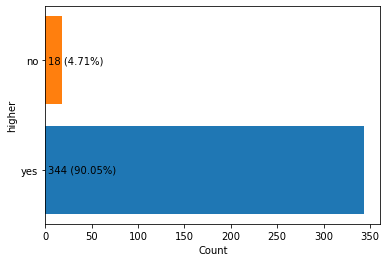

In [56]:
value_balance(main_df.higher)

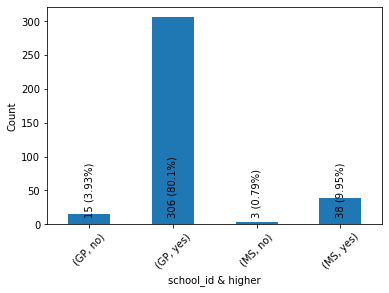

In [57]:
pt('school_id', 'higher')

### internet - наличие интернета дома

count     348
unique      2
top       yes
freq      294
Name: internet, dtype: object 
 
 Кол-во пустых значений: 34 (8.9%)


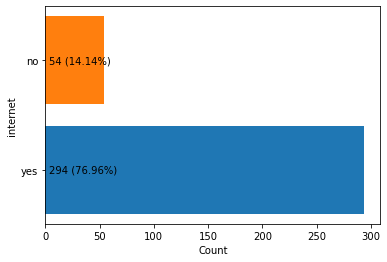

In [58]:
value_balance(main_df.internet)

### romantic - в романтических отношениях (yes или no)

count     351
unique      2
top        no
freq      232
Name: romantic, dtype: object 
 
 Кол-во пустых значений: 31 (8.12%)


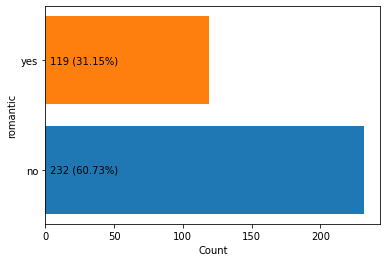

In [59]:
value_balance(main_df.romantic)

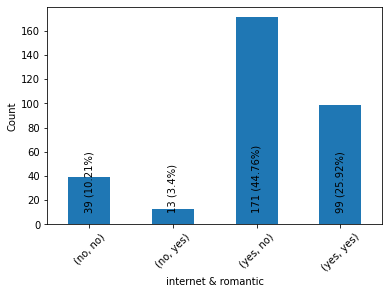

In [60]:
pt('internet', 'romantic')

### family_relation - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

count   356.00
mean      3.94
std       0.91
min       1.00
25%       4.00
50%       4.00
75%       5.00
max       5.00
Name: family_relation, dtype: float64 
 
 Кол-во пустых значений: 26 (6.81%)


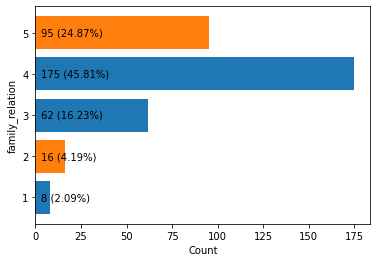

In [61]:
value_balance(main_df.family_relation)

- Так как большинство значени либо "хорошо" либо "очень хорошо", заменим пропущенные значения на моду

In [62]:
change2mode('family_relation')

count   382.00
mean      3.94
std       0.87
min       1.00
25%       4.00
50%       4.00
75%       4.00
max       5.00
Name: family_relation, dtype: float64 
 
 Кол-во пустых значений: 0 (0.0%)


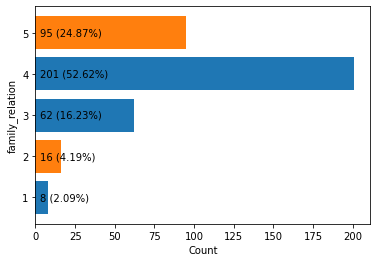

In [63]:
value_balance(main_df.family_relation)

### free_time - свободное время после школы (от 1 - очень мало до 5 - очень мого)

count   374.00
mean      3.23
std       0.98
min       1.00
25%       3.00
50%       3.00
75%       4.00
max       5.00
Name: free_time, dtype: float64 
 
 Кол-во пустых значений: 8 (2.09%)


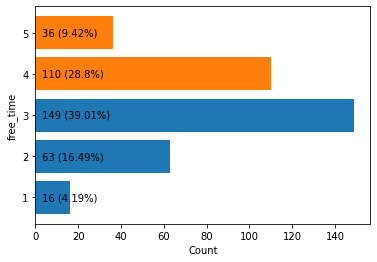

In [64]:
value_balance(main_df.free_time)

### go_out - проведение времени с друзьями (от 1 - очень мало до 5 - очень мого)

count   375.00
mean      3.10
std       1.11
min       1.00
25%       2.00
50%       3.00
75%       4.00
max       5.00
Name: go_out, dtype: float64 
 
 Кол-во пустых значений: 7 (1.83%)


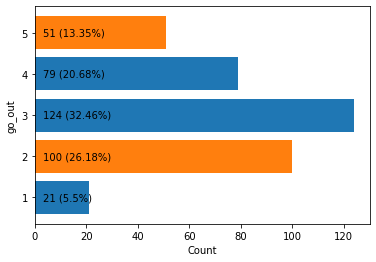

In [65]:
value_balance(main_df.go_out)

- Дети у которых много свободного времени так же много времени проводят вне дома. В дальнейшем будет интересно посмотреть насколько они коррелируют

### health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

count   367.00
mean      3.53
std       1.40
min       1.00
25%       3.00
50%       4.00
75%       5.00
max       5.00
Name: health, dtype: float64 
 
 Кол-во пустых значений: 15 (3.93%)


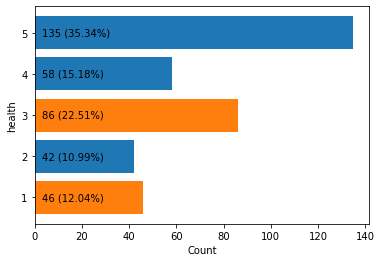

In [66]:
value_balance(main_df.health)

- Более 10% учеников имеют проблемы со здоровьем

### absences - количество пропущенных занятий

count   371.00
mean      5.14
std       5.88
min       0.00
25%       0.00
50%       4.00
75%       8.00
max      30.00
Name: absences, dtype: float64 
 
 Кол-во пустых значений: 11 (2.88%)


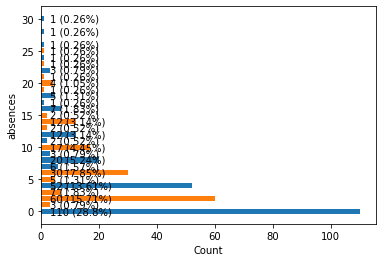

In [67]:
value_balance(main_df.absences)

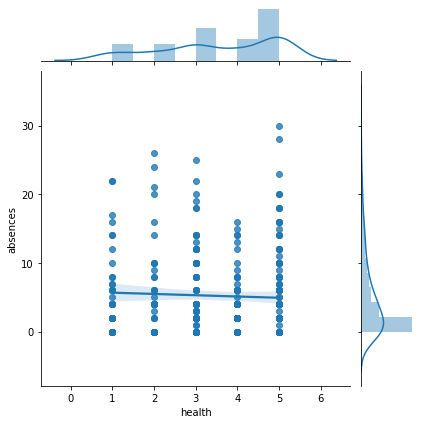

In [68]:
sns.jointplot(x = 'health', y = 'absences', data = main_df, kind = 'reg')

- Кол-во пропущенных занятий не сильно зависит от состояния здоровья

### score - баллы по госэкзамену по математике

count   382.00
mean     52.26
std      23.04
min       0.00
25%      40.00
50%      55.00
75%      70.00
max     100.00
Name: score, dtype: float64 
 
 Кол-во пустых значений: 0 (0.0%)


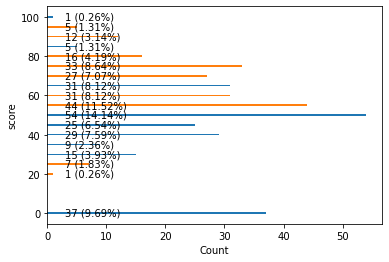

In [69]:
value_balance(main_df.score)

In [70]:
get_outlier('score')

25-й перцентиль: 40.0,  75-й перцентиль: 70.0,  IQR: 30.0,  Границы выбросов: [-5.0<->115.0]

Выбросов нет


- Экзамен по математике оценивается по 100 балльной шкале. Из этого можно предположить, что экзамен проходил в виде теста
- Поэтому причиной 0 баллов может быть в первую очередь "Отсутствие на экзамене", так как на любом тесте получить 0 баллов достаточно проблематично. И это косвенно подтверждается отсутствием значении между 0 и 20 баллами
- Отсюда, делать вывод об успеваемости при отсутствующем балле невозможно. Удалим учеников с 0 баллами

In [71]:
main_df = main_df.drop(main_df[main_df.score == 0].index, axis=0)

count   345.00
mean     57.87
std      16.21
min      20.00
25%      50.00
50%      55.00
75%      70.00
max     100.00
Name: score, dtype: float64 
 
 Кол-во пустых значений: 0 (0.0%)


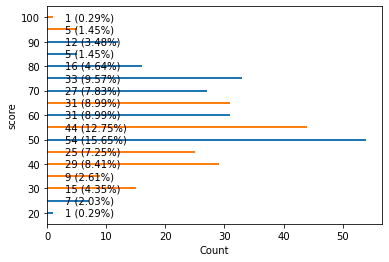

In [72]:
value_balance(main_df.score)

(array([ 8., 24., 29., 79., 44., 62., 60., 16., 17.,  6.]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

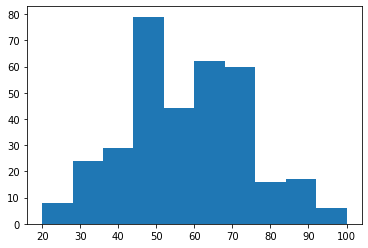

In [73]:
plt.hist(main_df.score)

In [74]:
get_outlier('score')

25-й перцентиль: 50.0,  75-й перцентиль: 70.0,  IQR: 20.0,  Границы выбросов: [20.0<->100.0]

Выбросов нет


# Корреляционный анализ

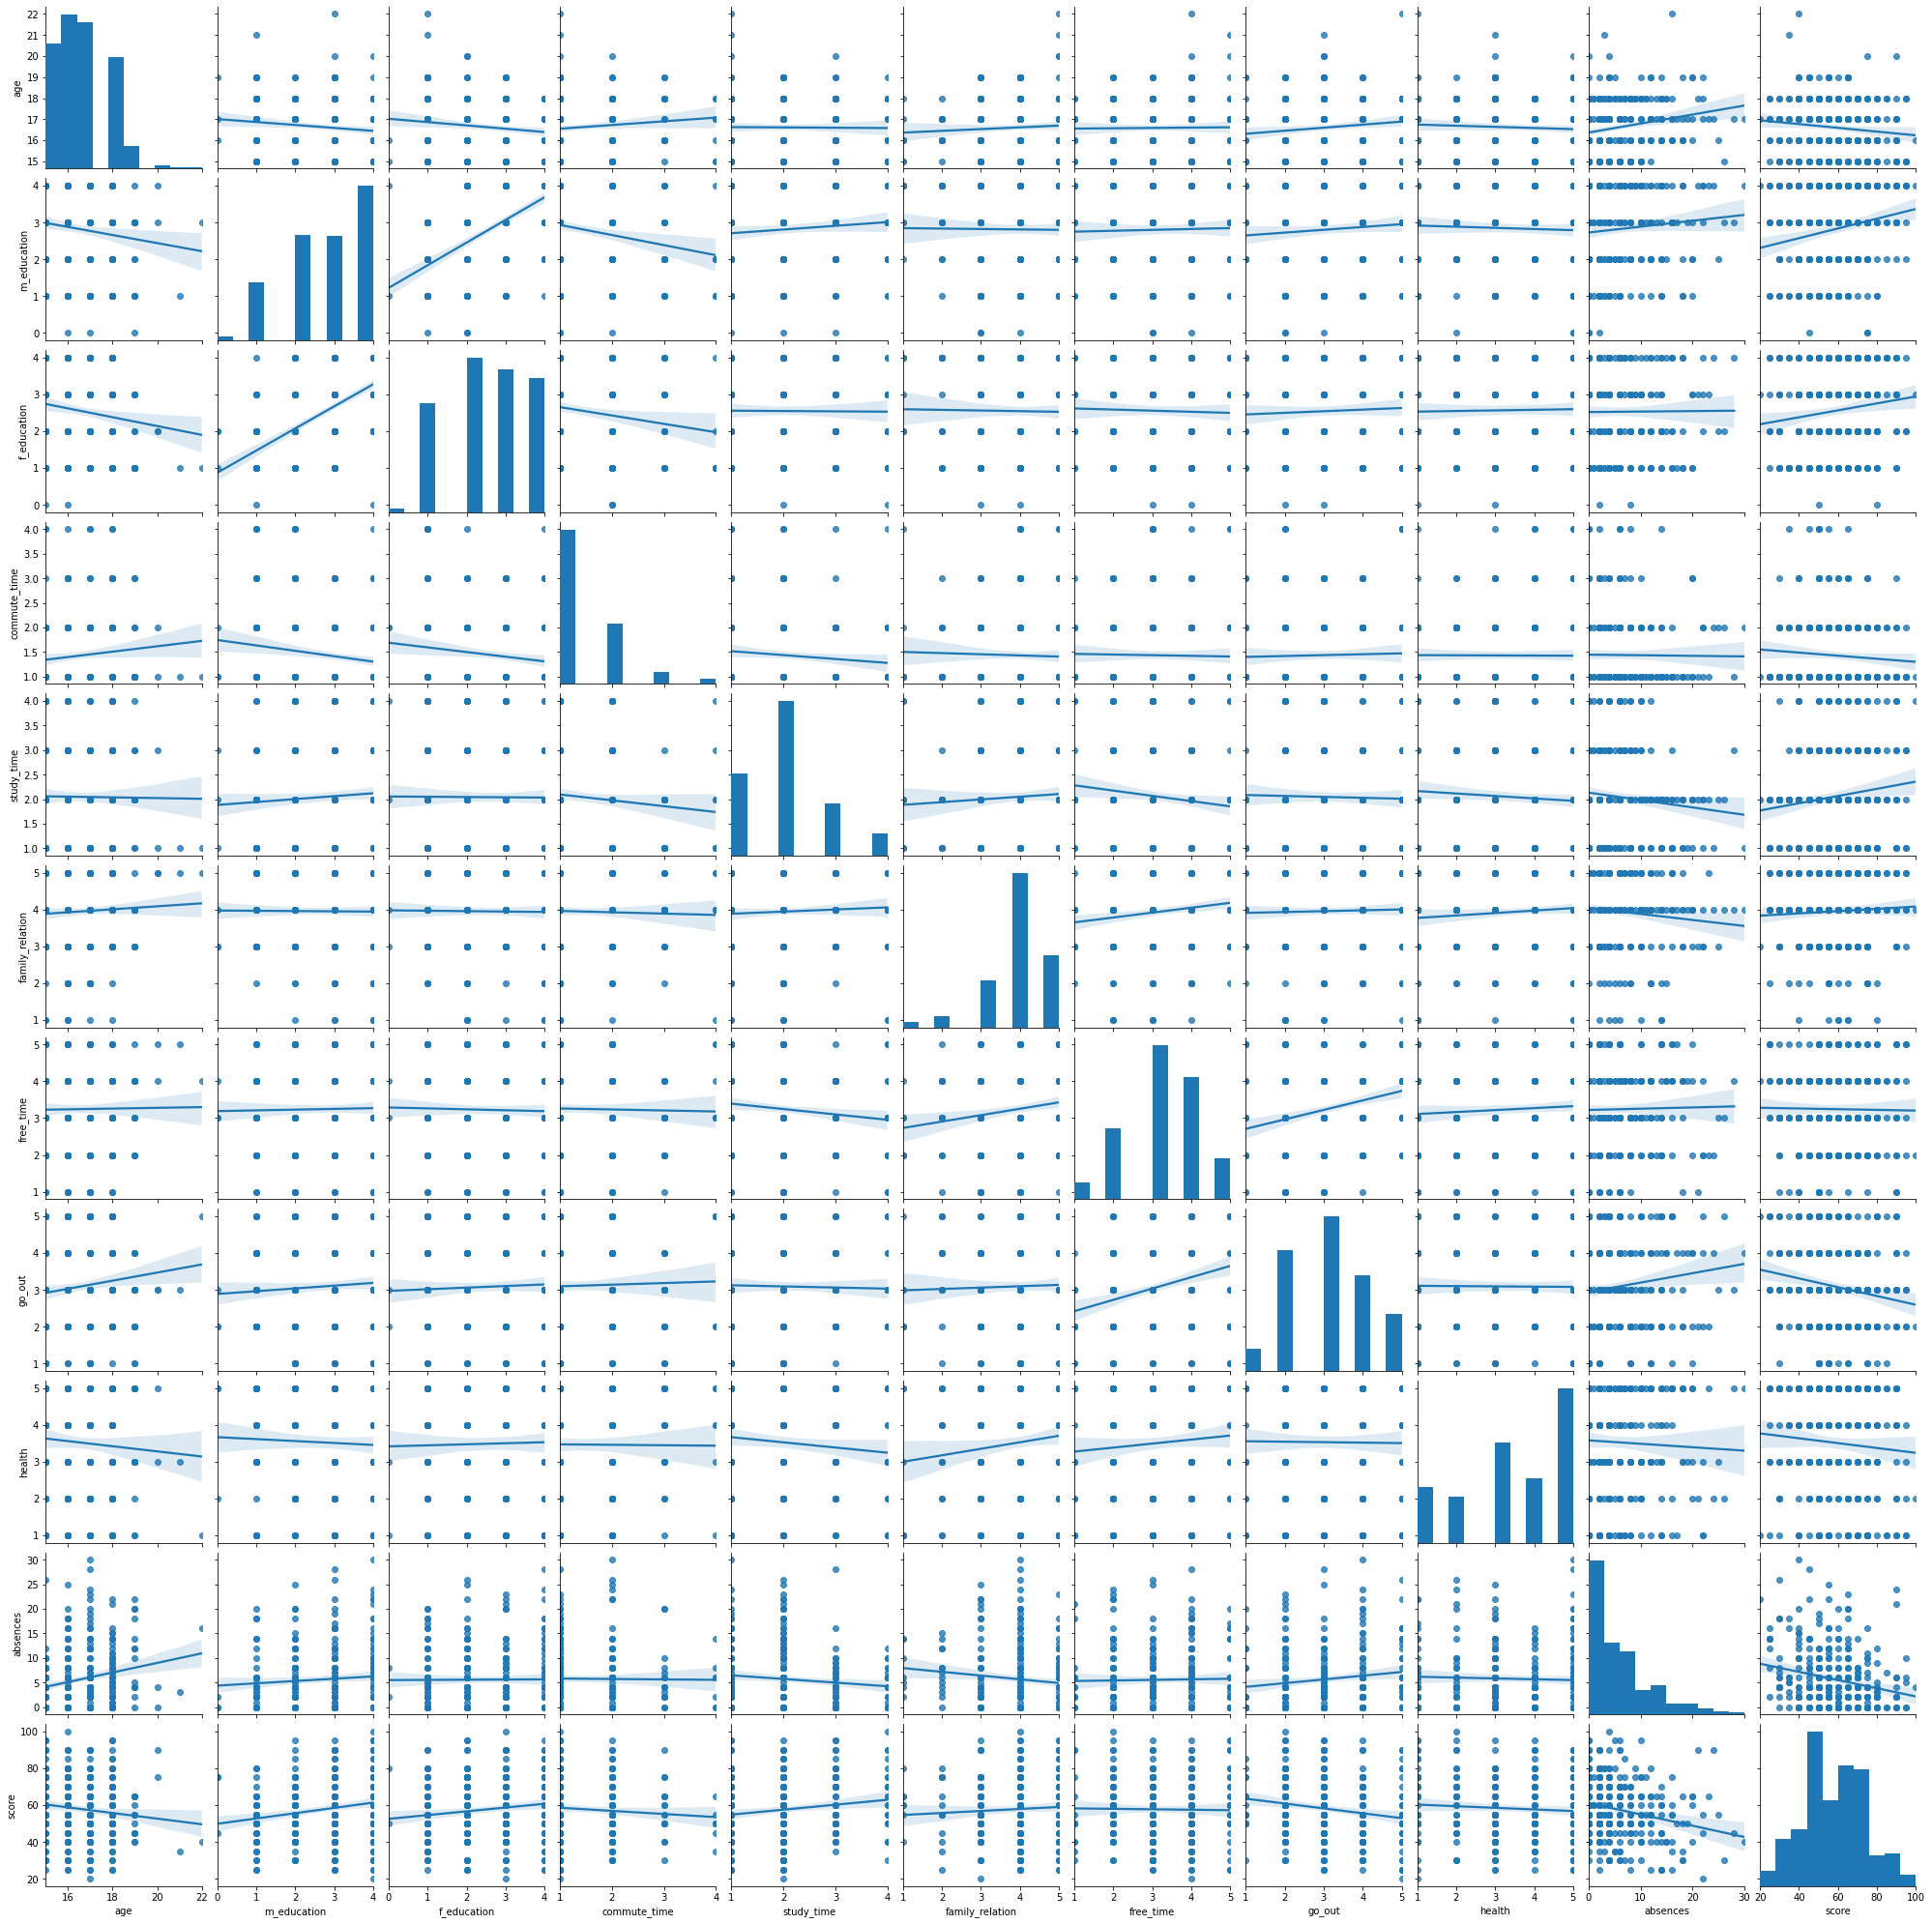

In [75]:
sns.pairplot(main_df, kind = 'reg')

In [76]:
main_df.corr()

,age,m_education,f_education,commute_time,study_time,family_relation,free_time,go_out,health,absences,score
age,1.00,-0.12,-0.14,0.10,-0.01,0.06,0.01,0.13,-0.06,0.20,-0.12
m_education,-0.12,1.00,0.61,-0.17,0.08,-0.01,0.02,0.08,-0.04,0.09,0.20
f_education,-0.14,0.61,1.00,-0.15,-0.01,-0.01,-0.03,0.04,0.02,0.01,0.14
commute_time,0.10,-0.17,-0.15,1.00,-0.10,-0.03,-0.02,0.03,-0.01,-0.01,-0.07
study_time,-0.01,0.08,-0.01,-0.10,1.00,0.06,-0.13,-0.02,-0.08,-0.11,0.14
family_relation,0.06,-0.01,-0.01,-0.03,0.06,1.00,0.15,0.03,0.11,-0.11,0.06
free_time,0.01,0.02,-0.03,-0.02,-0.13,0.15,1.00,0.28,0.08,0.02,-0.02
go_out,0.13,0.08,0.04,0.03,-0.02,0.03,0.28,1.00,-0.01,0.14,-0.18
health,-0.06,-0.04,0.02,-0.01,-0.08,0.11,0.08,-0.01,1.00,-0.04,-0.08
absences,0.20,0.09,0.01,-0.01,-0.11,-0.11,0.02,0.14,-0.04,1.00,-0.23


- Хорошо коррелируют между собой m_education и f_education, это может быть объяснено тем, что преимущественно пары создаются людьми из похожей социальной группы (корреляция 0.61)
- В пользу разделения на соц.группы так же говорит корреляция образования родителей и возраста ребенка (-0.12/-0.14). Чем хуже образование тем раньше заводят ребенка.
- еще можно отметить, что чем хуже образование у родителей тем больше времени ученик тратит на дорогу. Возможно школы находятся ближе к центру города где проживание стоит дороже (корреляция -0.17/-0.15)

- *Ученики постарше чаще пропускают уроки (корреляция 0.20), соответственно чем больше пропусков тем ниже оценка (корреляция -0.23).* 
- *Так же мы видим, что ученики у которых родители имеют хорошее образование чаще получают хорошие баллы. Причем образование матери коррелирует сильнее (0.20 против 0.14).*
- *Как и ожидалось ученики у которых много свободного времени чаще проводят время вне дома (корреляция 0.28). Что в свою очередь негативно сказывается на успеваемости (корреляция -0.18)*
- *Причем время затраченное на учебу коррелирует с полученными баллами (0.14) меньше чем образование матери, временем проведенным вне дома и пропущенными уроками*

In [77]:
# main_df = main_df.drop('f_education', axis=1)

# Анализ номинативных переменных

In [78]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=main_df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

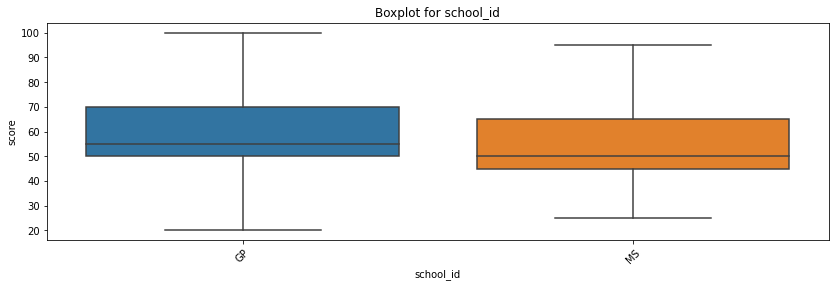

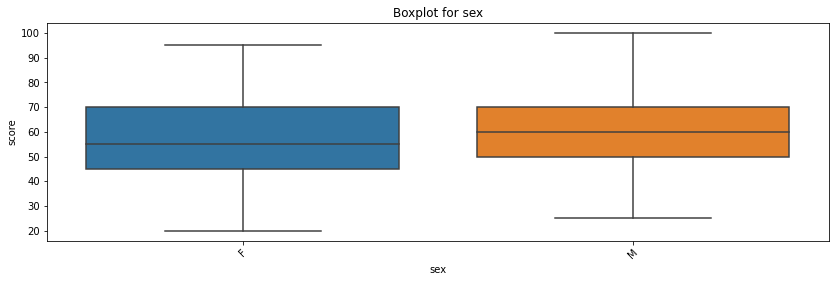

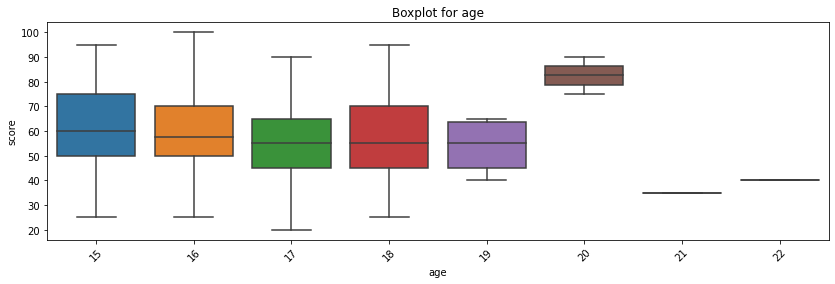

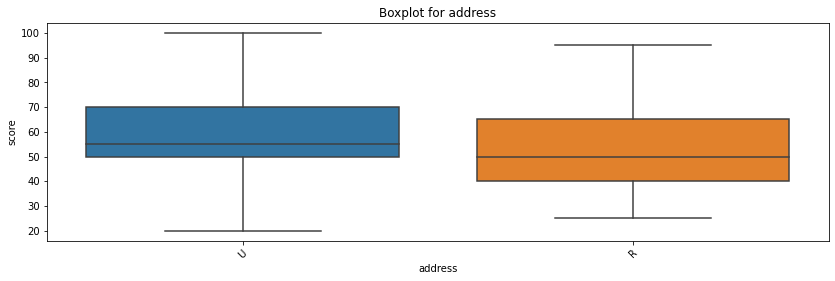

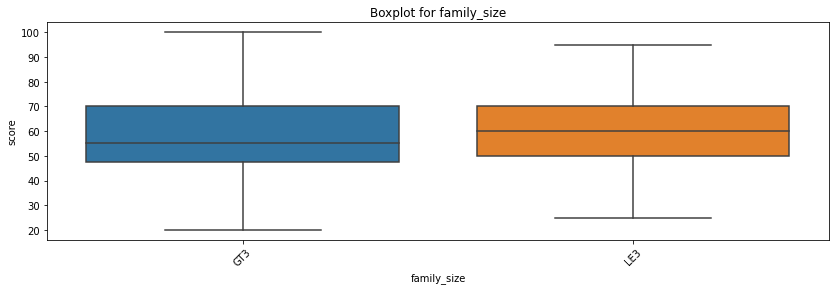

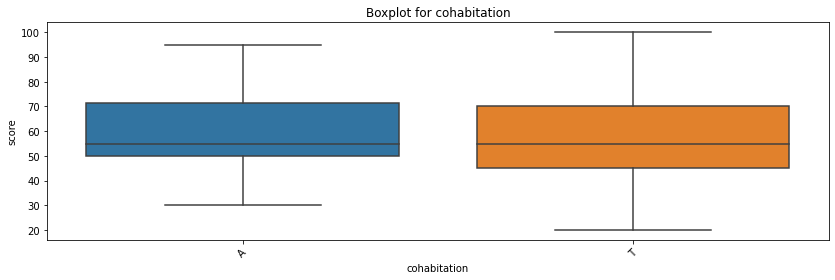

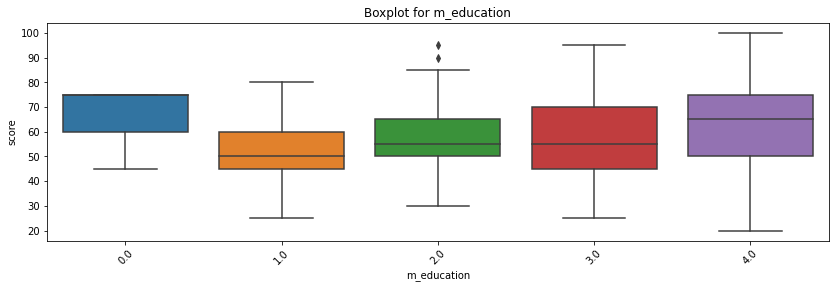

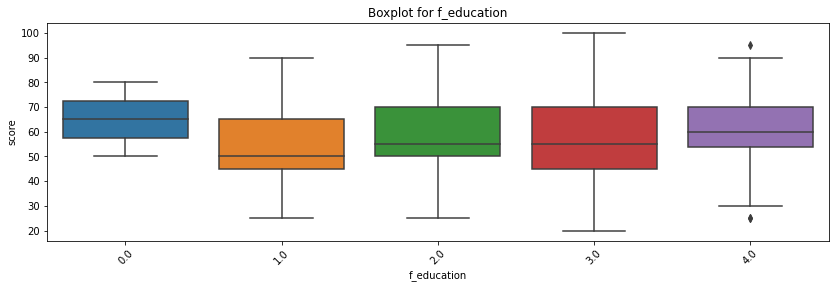

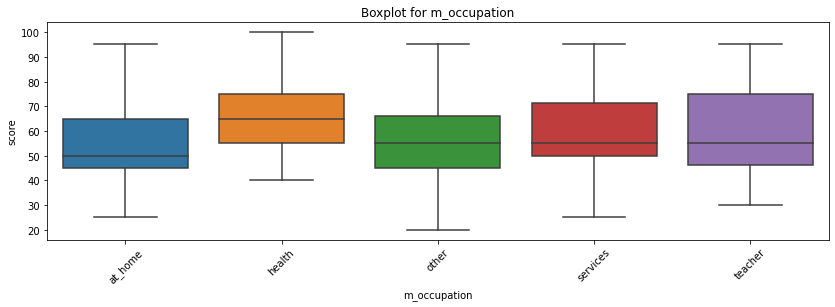

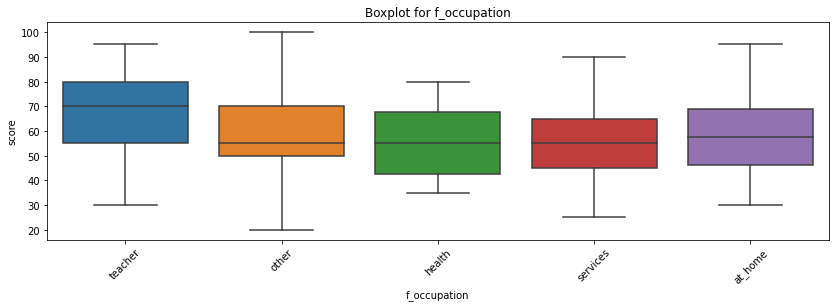

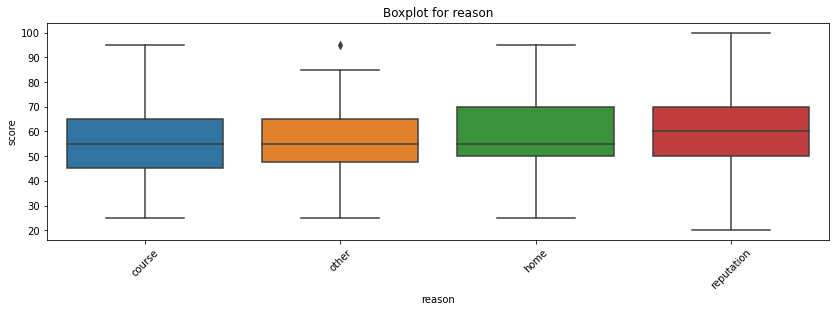

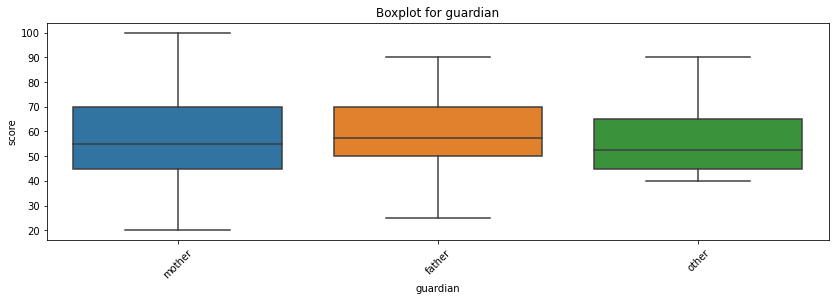

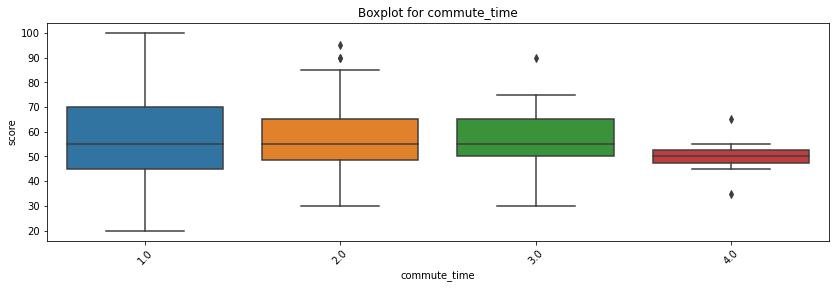

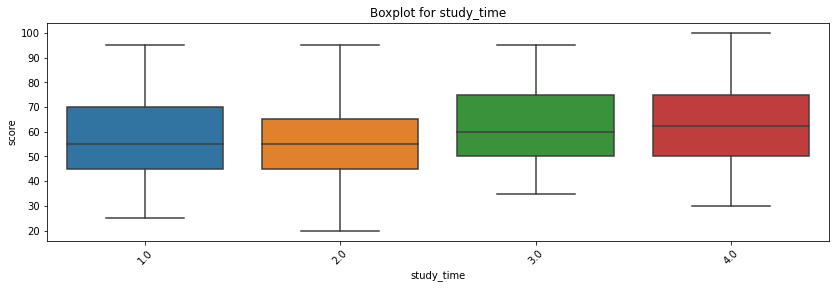

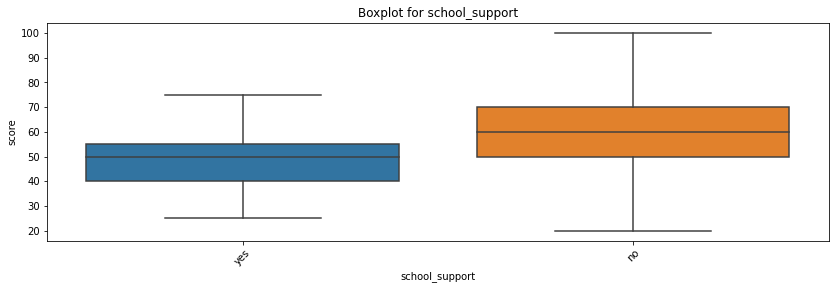

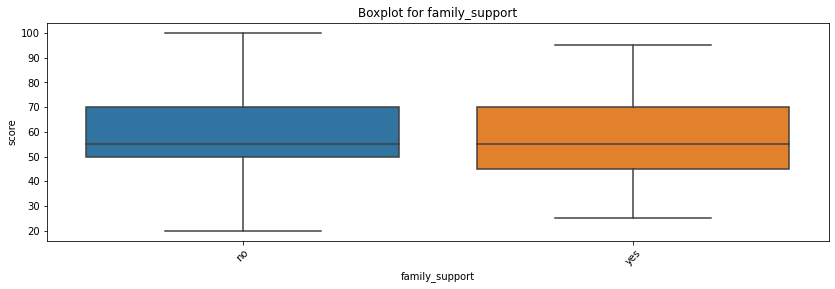

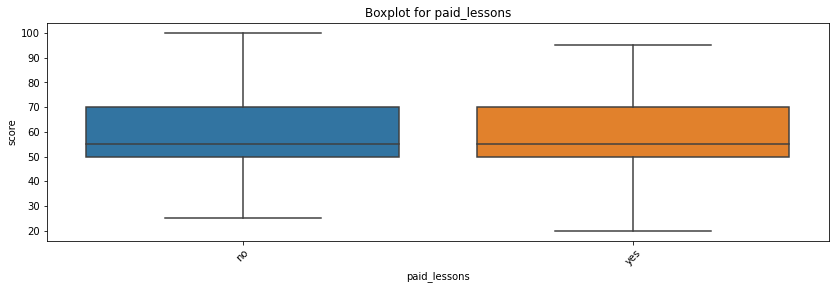

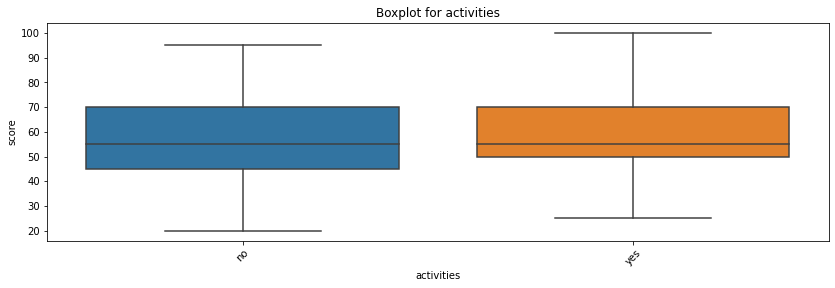

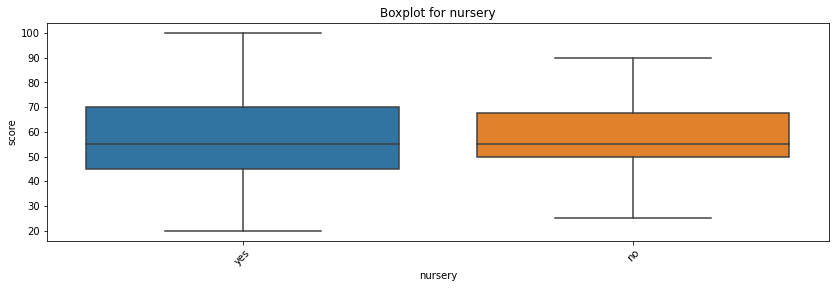

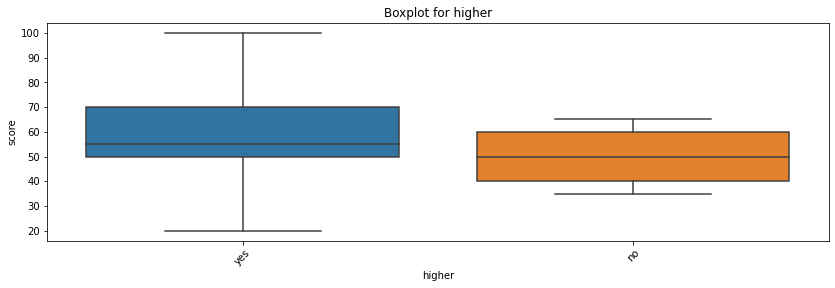

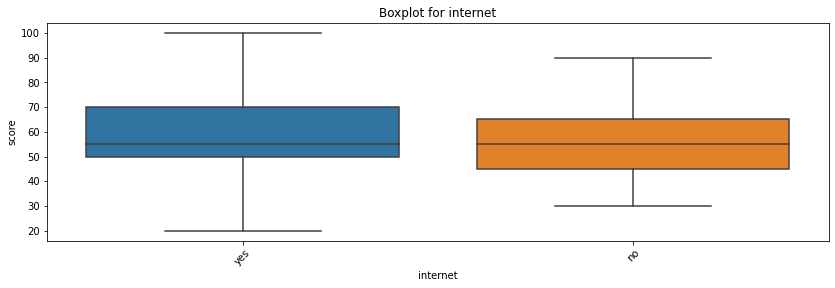

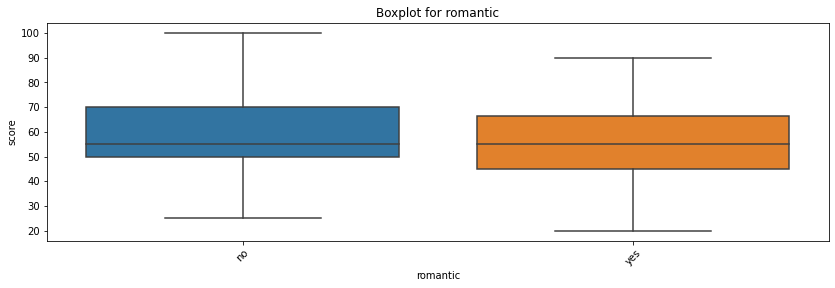

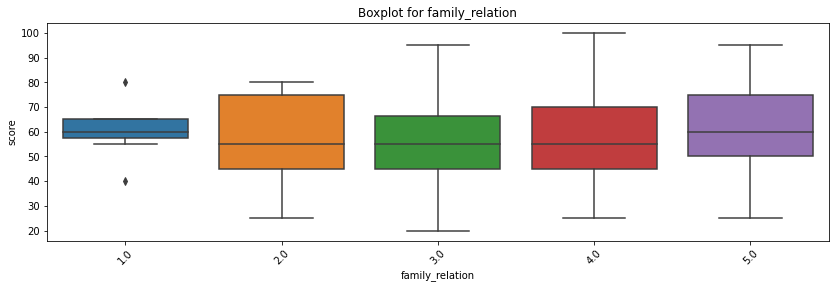

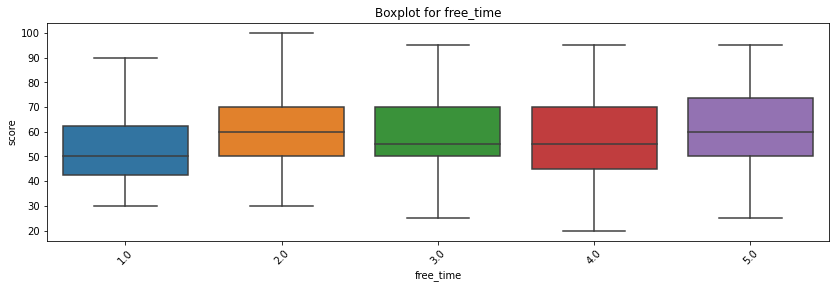

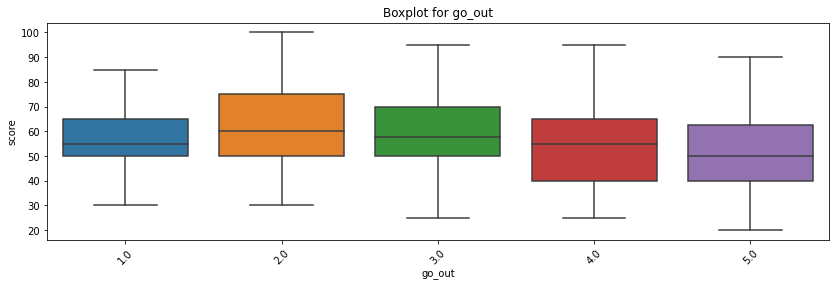

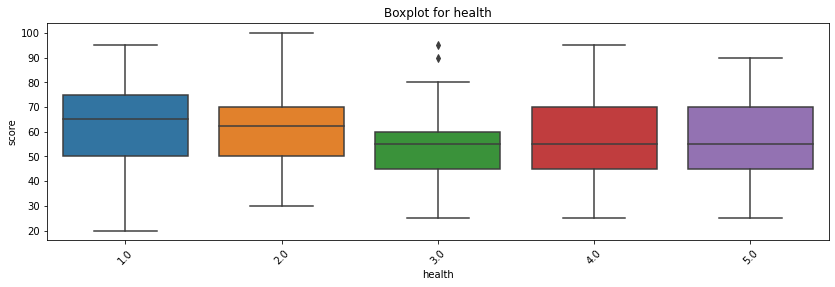

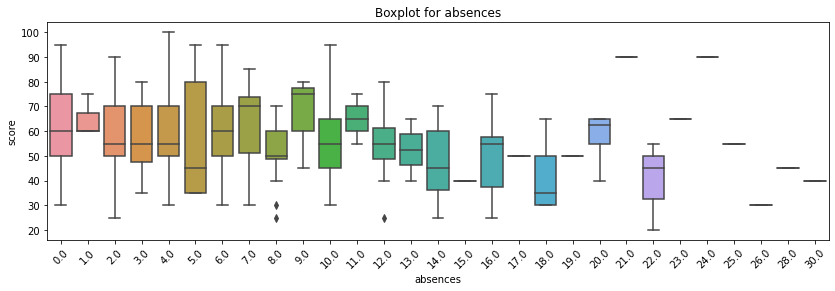

In [79]:
for col in main_df.columns[0:-1]:
    get_boxplot(col)

### Тест Стьюдента
- Проверяем нулевую гипотезу, что распределения баллов по различным параметрам неразличимы

In [80]:
def get_stat_dif(column):
    cols = main_df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(main_df.loc[main_df.loc[:, column] == comb[0], 'score'],
                     main_df.loc[main_df.loc[:, column] == comb[1], 'score']).pvalue\
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [81]:
for col in main_df.columns[0:-1]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_education
Найдены статистически значимые различия для колонки f_education
Найдены статистически значимые различия для колонки m_occupation
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки school_support
Найдены статистически значимые различия для колонки go_out


C:\Users\scher\DataScience\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\scher\DataScience\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\scher\DataScience\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


- Тест частично подтвердил выводы сделанные на основе корреляционного анализа, что возраст ученика, образование матери и время проведенной вне дома влияют на успеваемость ученика.
- Так же статистически значимыми оказались место проживания, род занятий матери и поддержка школы


Оставим эти переменные в датасете для дальнейшего построения модели.

In [82]:
model_df = main_df.loc[:, ['sex',
                           'age',
                           'address',
                           'm_education',
                           'f_education',
                           'm_occupation',
                           'study_time',
                           'school_support',
                           'go_out']]
model_df.head()

,sex,age,address,m_education,f_education,m_occupation,study_time,school_support,go_out
0,F,18,U,4.00,4.00,at_home,2.00,yes,4.00
1,F,17,U,1.00,1.00,at_home,2.00,no,3.00
2,F,15,U,1.00,1.00,at_home,2.00,yes,2.00
3,F,15,U,4.00,2.00,health,3.00,no,2.00
4,F,16,U,3.00,3.00,other,2.00,no,2.00


# Выводы

- В данных достаточно мало пустых значений, в среднем в столбцах незаполненными оказалось 5.85% строк
- Выбросы найдены только в столбце с количеством пропущенных уроков. Так же в столбцах "образование отца" и "семейные отношения" было найдено всего пара опечаток. что позволяет сделать вывод о том, что данные достаточно чистые
- Было выявлено несколько параметров, которые потенциально влияют на успеваемость учащегося. Такие как: sex', 'age', 'address', 'm_education', 'f_education', 'm_occupation', 'study_time', 'school_support', 'go_out'. Которые хотелось бы использовать в дальнейшем для построения модели и более четкого понимания зависемостей